<a href="https://colab.research.google.com/github/Guru2308/Feynn-Labs/blob/main/Chatheriyan/Mc_D_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tabulate import tabulate

In [158]:
df = pd.read_csv('/content/mcdonalds.csv')

In [159]:
df.head()

yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male

In [160]:
df.shape

(1453, 15)

In [161]:
list(df)

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [162]:
df.ndim, df.size

(2, 21795)

In [163]:
df.info

<bound method DataFrame.info of      yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gen

Data Pre-processing

In [164]:
df_new= df.iloc[:,0:11].replace({"Yes":1,"No":0})
df_new

yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  
0             1        0           0  
1             1        0           0  
2             1        1           0  
3             0        0           1  
4             0        1           0  
...         ...      ...         ...  
1448          1        0           1  
1449          0        1           0  
1450          1        0           0  
1451          0        1           0  
1452          1        0           1  

[1453 rows x 11 columns]

2D Representation

In [165]:
import pandas as pd
import plotly.express as px

from sklearn.manifold import TSNE

# Assuming 'df_new' is the DataFrame containing the data

# Perform t-SNE dimensionality reduction
m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(df_new)

# Create a new DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_features, columns=['x', 'y'])
tsne_df = pd.concat([tsne_df, df_new], axis=1)

# Iterate over each feature and create separate scatter plots
for feature in df_new.columns:
    fig = px.scatter(tsne_df, x='x', y='y', color=feature)
    fig.show()


3D Representation

In [166]:
import pandas as pd
import plotly.graph_objects as go

from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(df_new)

tsne_df = pd.DataFrame(tsne_features, columns=['x', 'y'])
tsne_df = pd.concat([tsne_df, df_new], axis=1)

fig = go.Figure()

# Add traces for each column
for column in ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
               'tasty', 'expensive', 'healthy', 'disgusting']:
    fig.add_trace(go.Scatter3d(
        x=-tsne_df['x'],  # Reverse the x-coordinate values to move markers to the left side
        y=tsne_df['y'],
        z=[0] * len(tsne_df),
        mode='markers',
        marker=dict(
            size=5,
            color=tsne_df[column].map({1: 'rgb(31, 119, 180)', 0: 'rgb(255, 127, 14)'}),  # Custom color choices
            colorscale='Viridis'
        ),
        name=column
    ))

fig.update_layout(scene=dict(
    xaxis_title='x',
    yaxis_title='y',
    zaxis_title='z'
))

# Add text annotation for color mapping
fig.update_layout(
    annotations=[
        dict(
            x=0.9,
            y=0.95,
            xref='paper',
            yref='paper',
            text='Color Mapping: 1 - Blue, 0 - Orange',
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig.show()


In [167]:
data = pd.read_csv('mcdonalds.csv')

In [168]:
final = {'Yes':1, 'No':0}
final1 = {'Male':1, 'Female':2}
final2 = {'Every three months':3,'Once a year':4,'Once a month':5,'Once a week':6,'More than once a week':7,'Never':8}
final3 = {'I love it!+5':5,'I hate it!-5':-5,'-4':-4,'-3':-3,'-2':-2,'-1':-1,'0':0,'+1':1,'+2':2,'+3':3,'+4':4}
data["yummy"] = data.yummy.map(final)
data["convenient"] = data.convenient.map(final)
data["spicy"] = data.spicy.map(final)
data["fattening"] = data.fattening.map(final)
data["greasy"] = data.greasy.map(final)
data["fast"] = data.fast.map(final)
data["cheap"] = data.cheap.map(final)
data["tasty"] = data.tasty.map(final)
data["expensive"] = data.expensive.map(final)
data["healthy"] = data.healthy.map(final)
data["disgusting"] = data.disgusting.map(final)
data["Like"] = data.Like.map(final3)
data["VisitFrequency"] = data.VisitFrequency.map(final2)
data["Gender"] = data.Gender.map(final1)

data


yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  Gender  
0             1        0           0    -3   61               3       2  
1             1        0           0     2   51               3       2  
2             1        1           0     1   62               3       2  
3             0        0           1     4   69               6       2  
4             0        1           0     2   49               5       1  
...         ...      ...         ...   ...  ...             ...     ...  
1448          1        0           1    -5   47               4       1  
1449          0        1           0     2   36               6       2  
1450          1        0           0     3   52               5       2  
1451          0        1           0     4   41               3       1  
1452          1        0           1    -3   30               3       1  

[1453 rows x 15 columns]

array([[<Axes: title={'center': 'yummy'}>,
        <Axes: title={'center': 'convenient'}>,
        <Axes: title={'center': 'spicy'}>,
        <Axes: title={'center': 'fattening'}>,
        <Axes: title={'center': 'greasy'}>,
        <Axes: title={'center': 'fast'}>,
        <Axes: title={'center': 'cheap'}>,
        <Axes: title={'center': 'tasty'}>],
       [<Axes: title={'center': 'expensive'}>,
        <Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'disgusting'}>,
        <Axes: title={'center': 'Like'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'VisitFrequency'}>,
        <Axes: title={'center': 'Gender'}>, <Axes: >]], dtype=object)

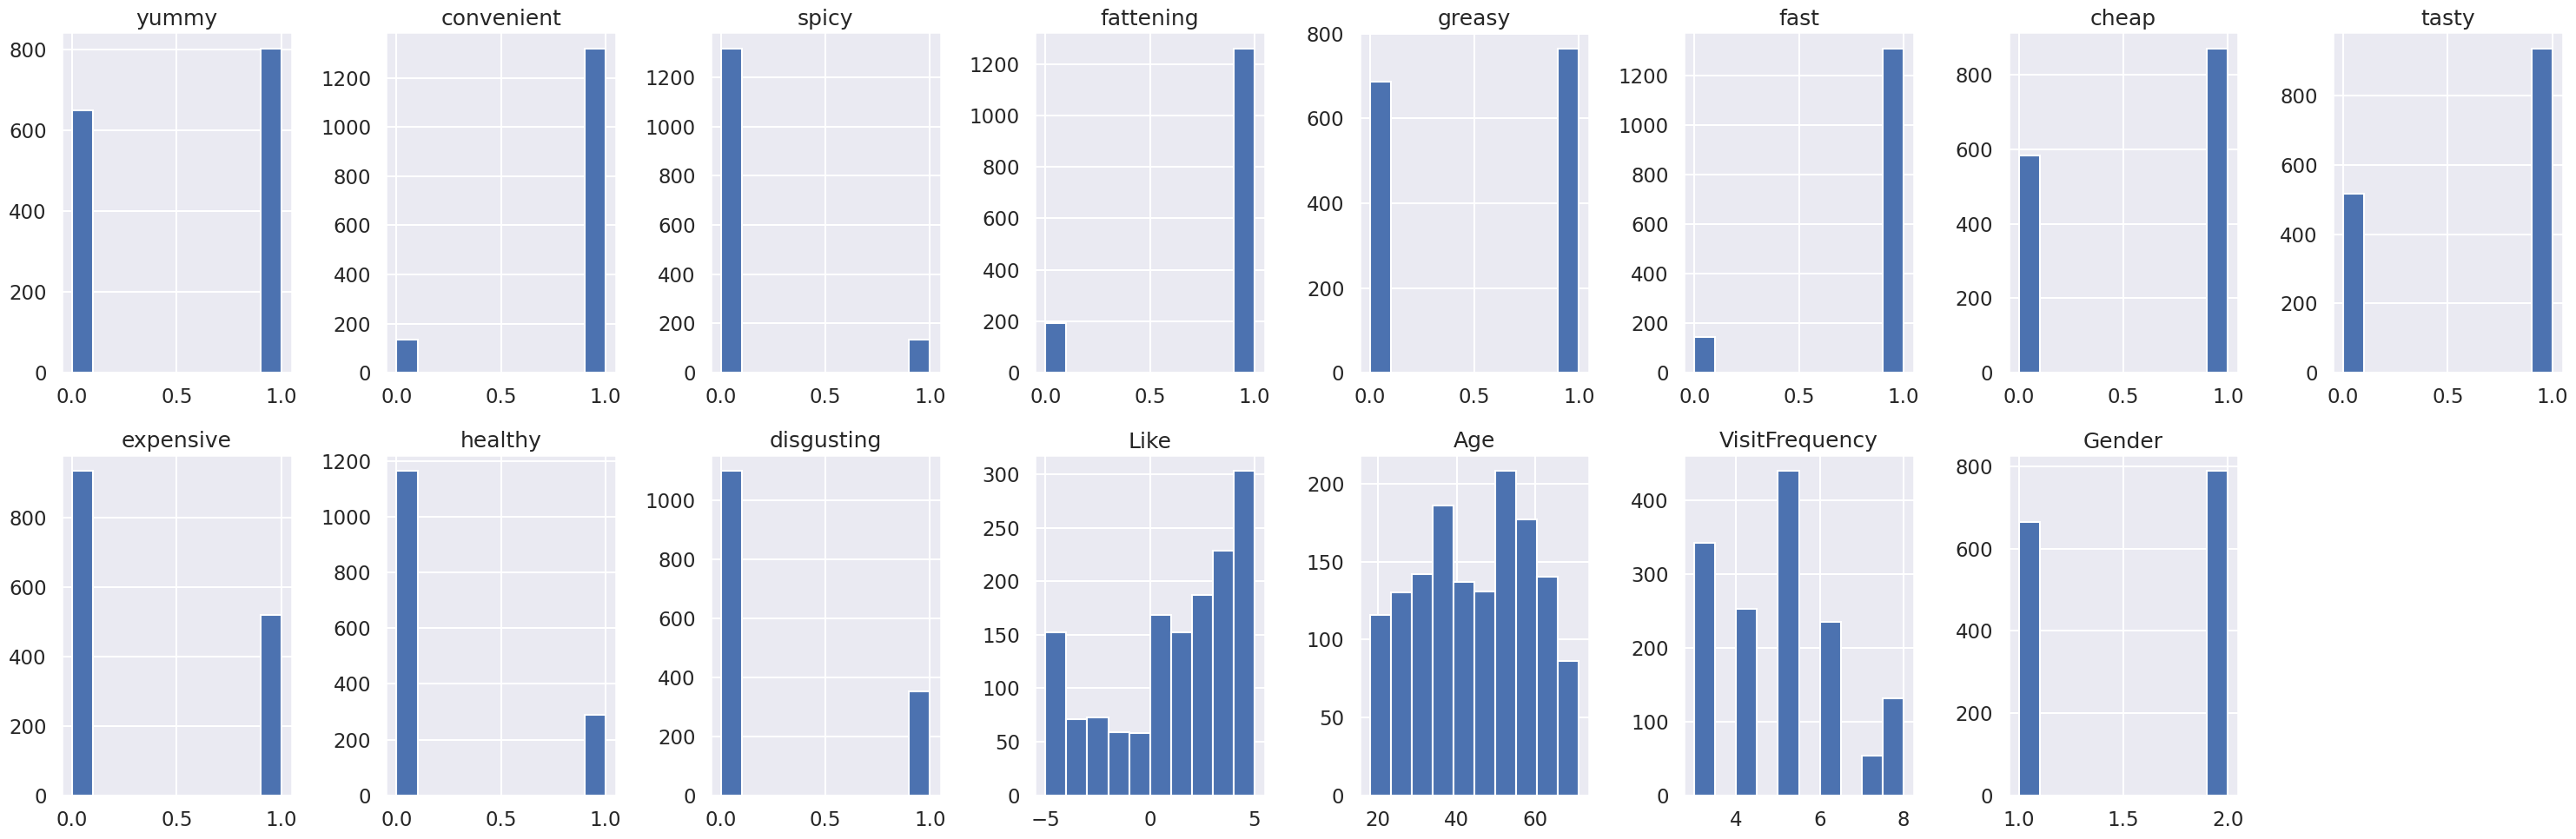

In [169]:
data.hist(layout=(2,8), figsize=(30,10))

<Axes: >

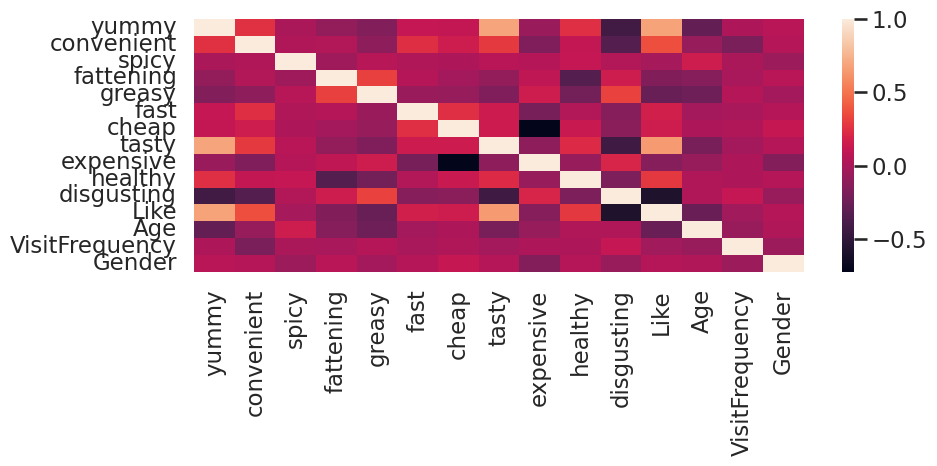

In [170]:
corr=data.corr()
plt.figure(1, figsize=(10,5))
sns.heatmap(corr)

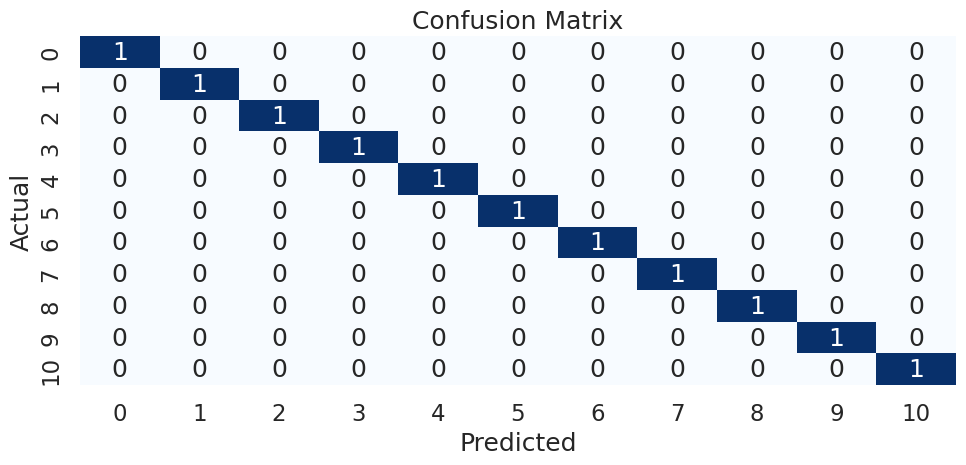

In [171]:
from sklearn.metrics import confusion_matrix
actual_labels = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
               'tasty', 'expensive', 'healthy', 'disgusting']  # Actual labels
predicted_labels = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
               'tasty', 'expensive', 'healthy', 'disgusting']  # Predicted labels

cm = confusion_matrix(actual_labels, predicted_labels)

fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

plt.show()

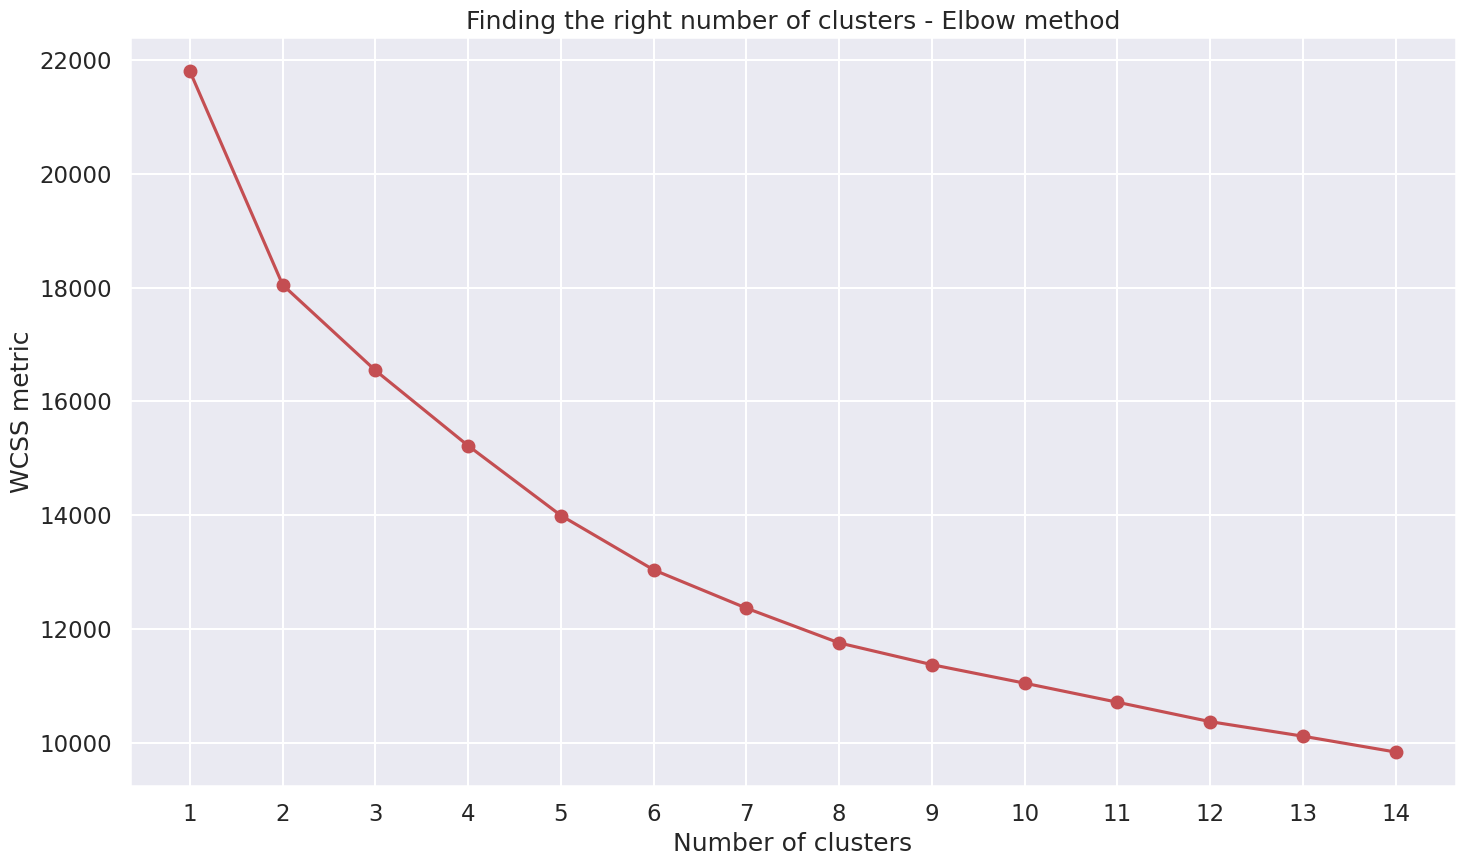

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data.loc[data['cheap'] == '', 'cheap'] = 0
data['cheap'] = data['cheap'].astype(float)

scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

wcss_values = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10)
    kmeans.fit(normalized_data)
    wcss_values.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss_values, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS metric')
plt.title('Finding the right number of clusters - Elbow method')
plt.xticks(range(1, 15))
plt.show()

In [173]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, n_init=10)
kmeans.fit(normalized_data)

cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=data.columns)
labels = kmeans.labels_

data_with_centroids = pd.concat([data, pd.DataFrame({'centroid': labels})], axis=1)
data_with_centroids

yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1    1.0      0   
1         1           1      0          1       1     1    1.0      1   
2         0           1      1          1       1     1    0.0      1   
3         1           1      0          1       1     1    1.0      1   
4         0           1      0          1       1     1    1.0      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0    0.0      0   
1449      1           1      0          1       0     0    1.0      1   
1450      1           1      0          1       0     1    0.0      1   
1451      1           1      0          0       0     1    1.0      1   
1452      0           1      0          1       1     0    0.0      0   

      expensive  healthy  disgusting  Like  Age  VisitFrequency  Gender  \
0             1        0           0    -3   61               3       2   
1             1        0           0     2   51               3       2   
2             1        1           0     1   62               3       2   
3             0        0           1     4   69               6       2   
4             0        1           0     2   49               5       1   
...         ...      ...         ...   ...  ...             ...     ...   
1448          1        0           1    -5   47               4       1   
1449          0        1           0     2   36               6       2   
1450          1        0           0     3   52               5       2   
1451          0        1           0     4   41               3       1   
1452          1        0           1    -3   30               3       1   

      centroid  
0            2  
1            1  
2            0  
3            4  
4            2  
...        ...  
1448         6  
1449         4  
1450         1  
1451         5  
1452         6  

[1453 rows x 16 columns]

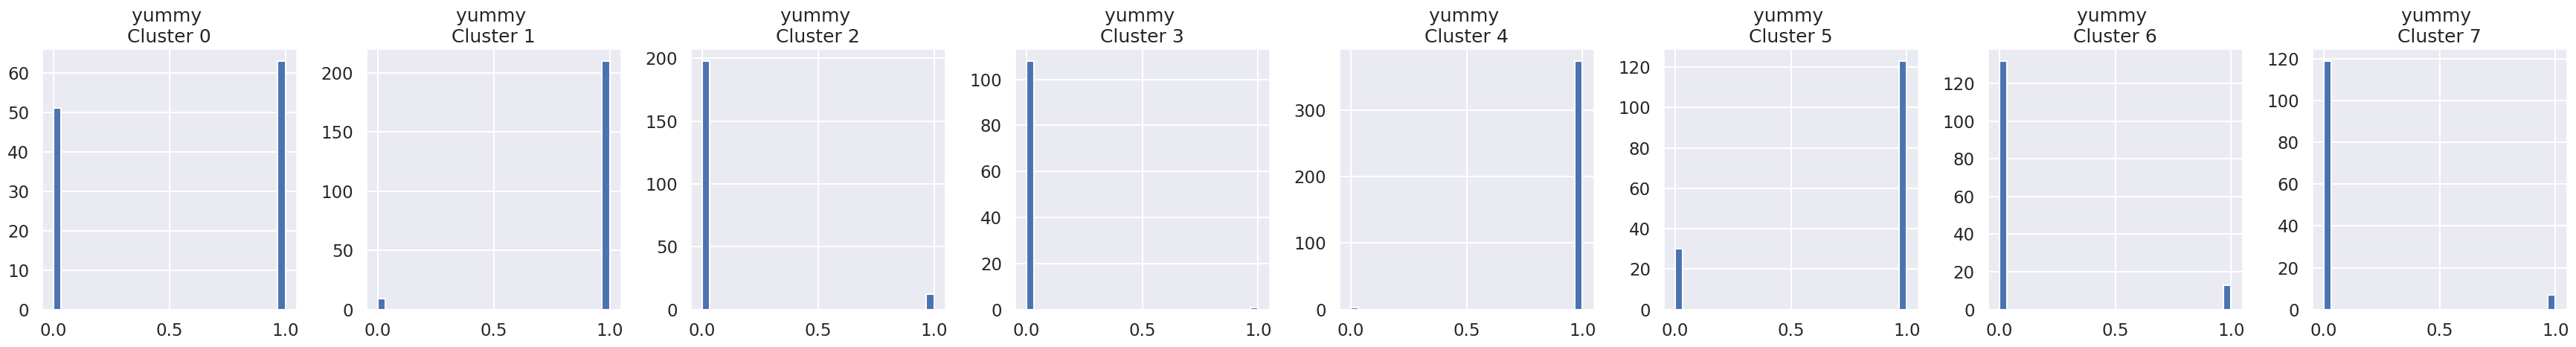

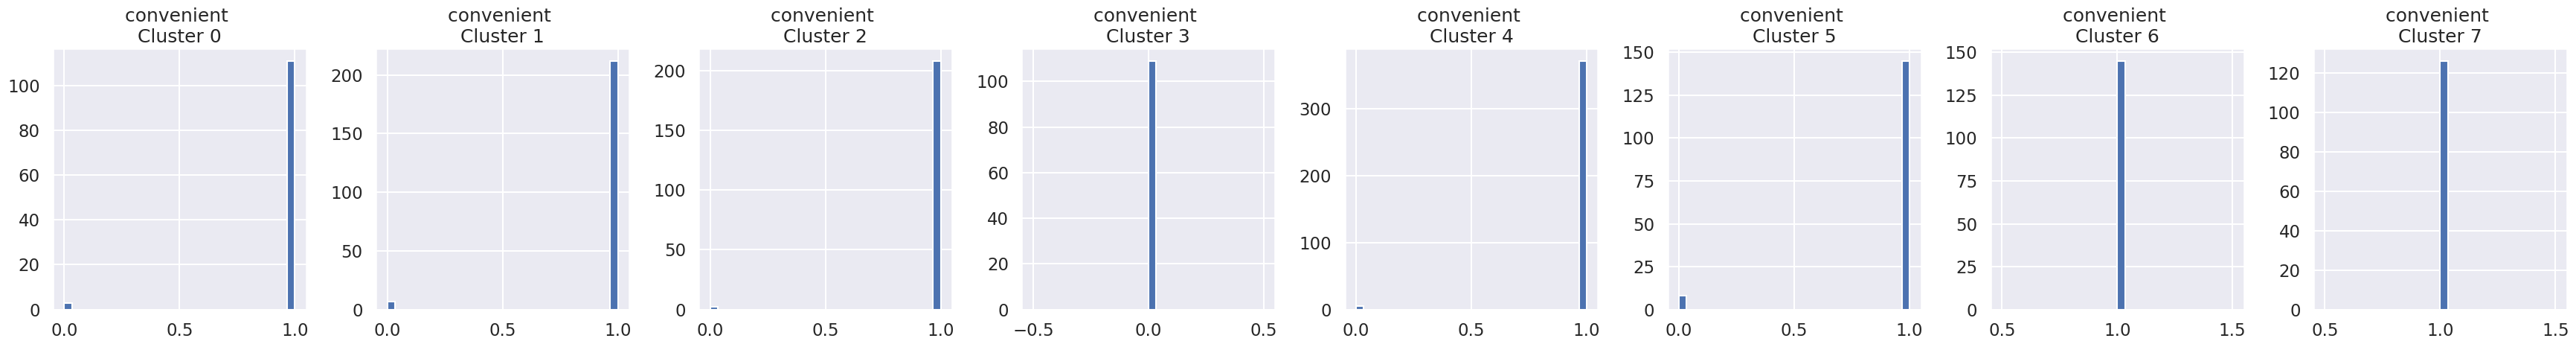

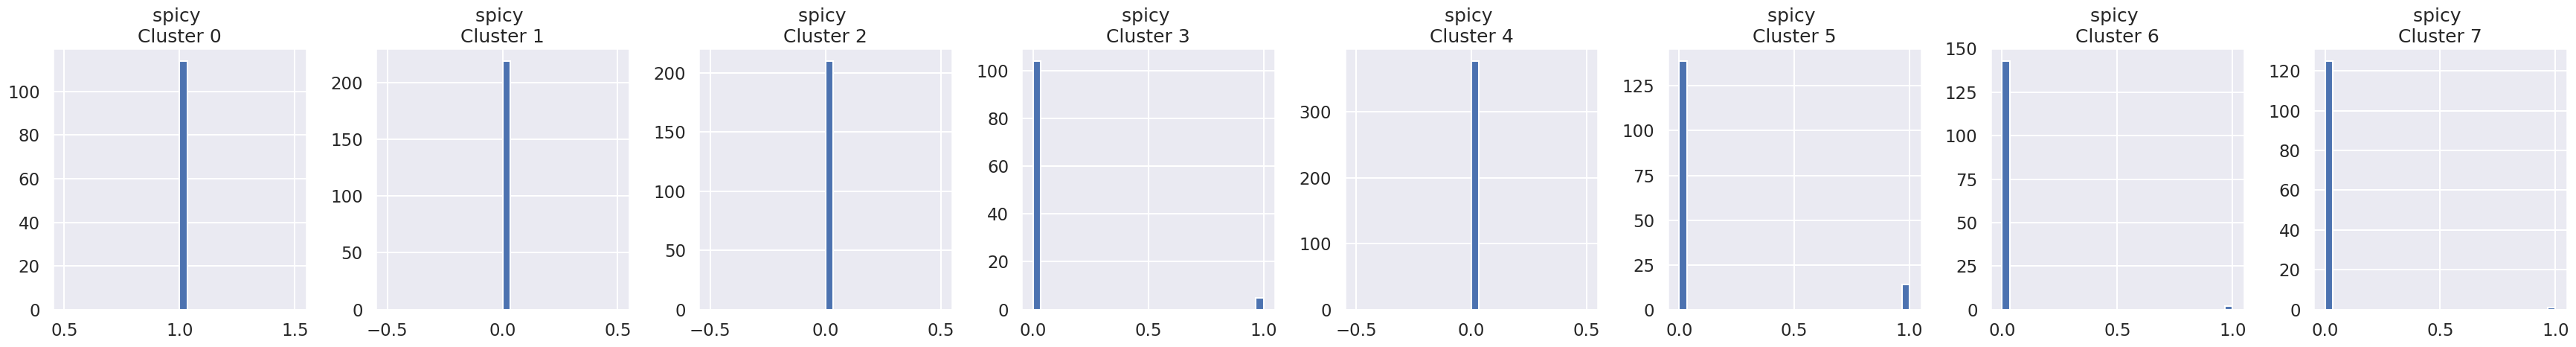

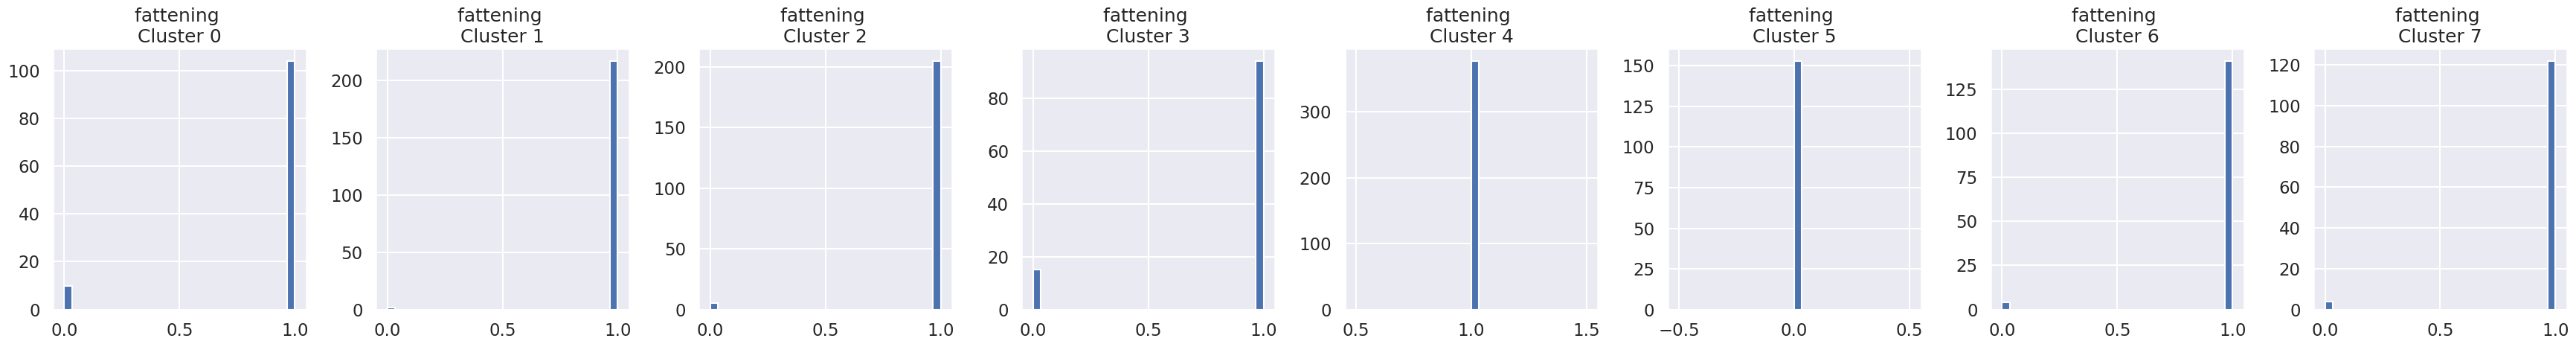

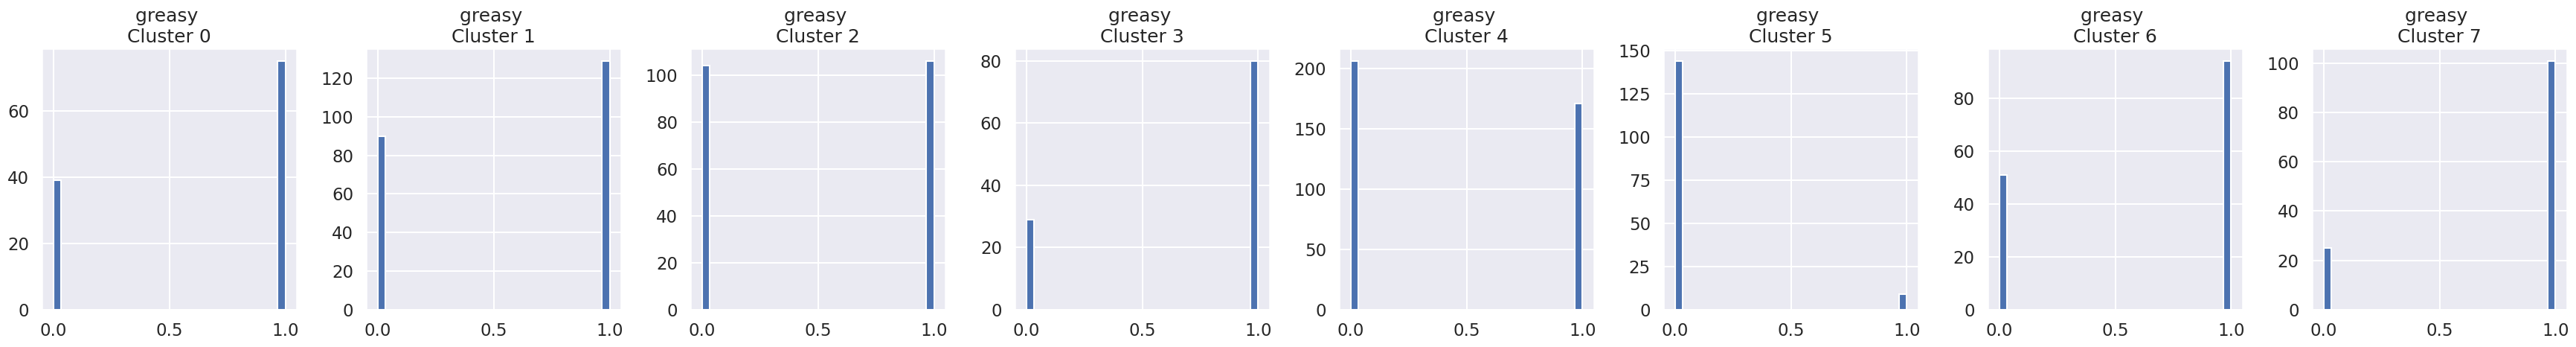

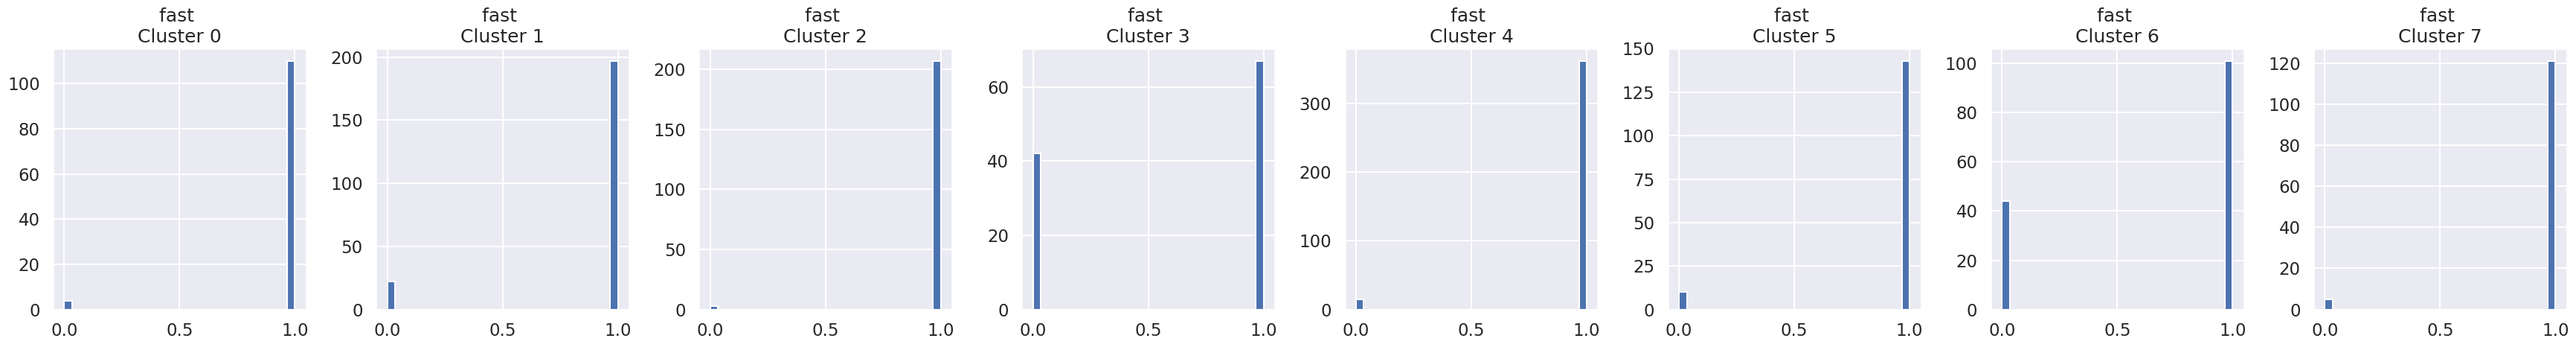

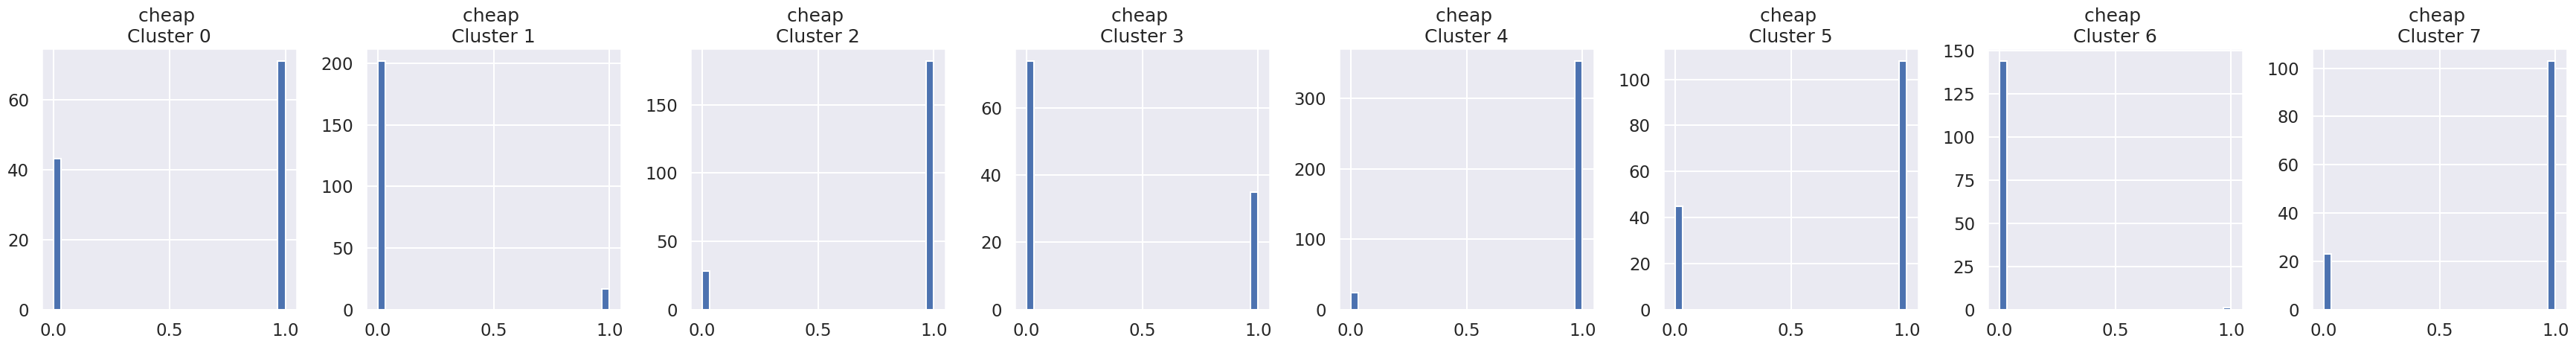

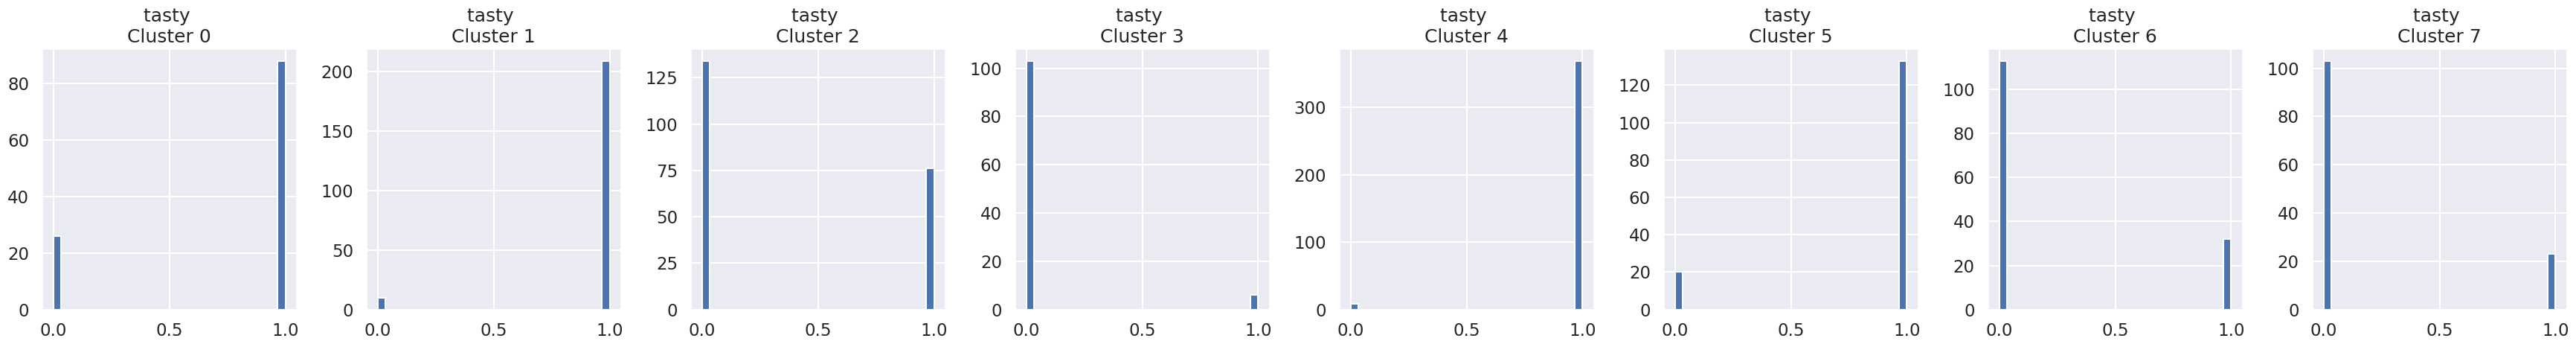

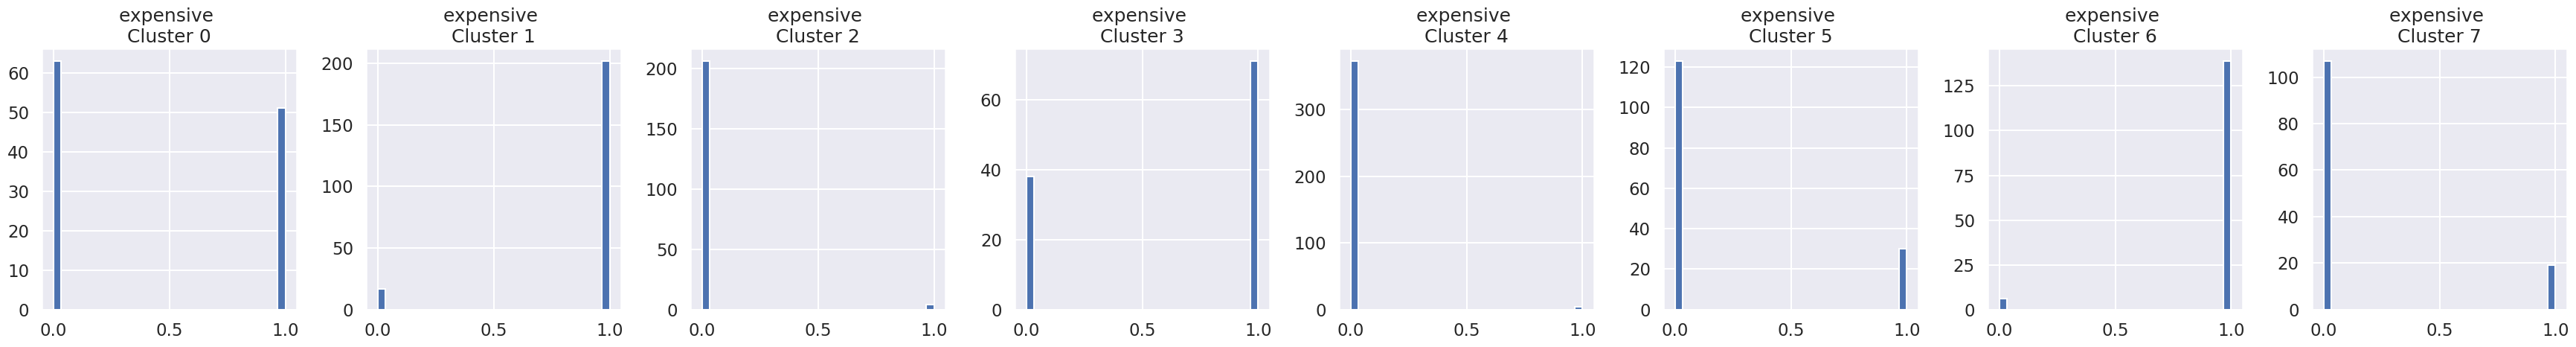

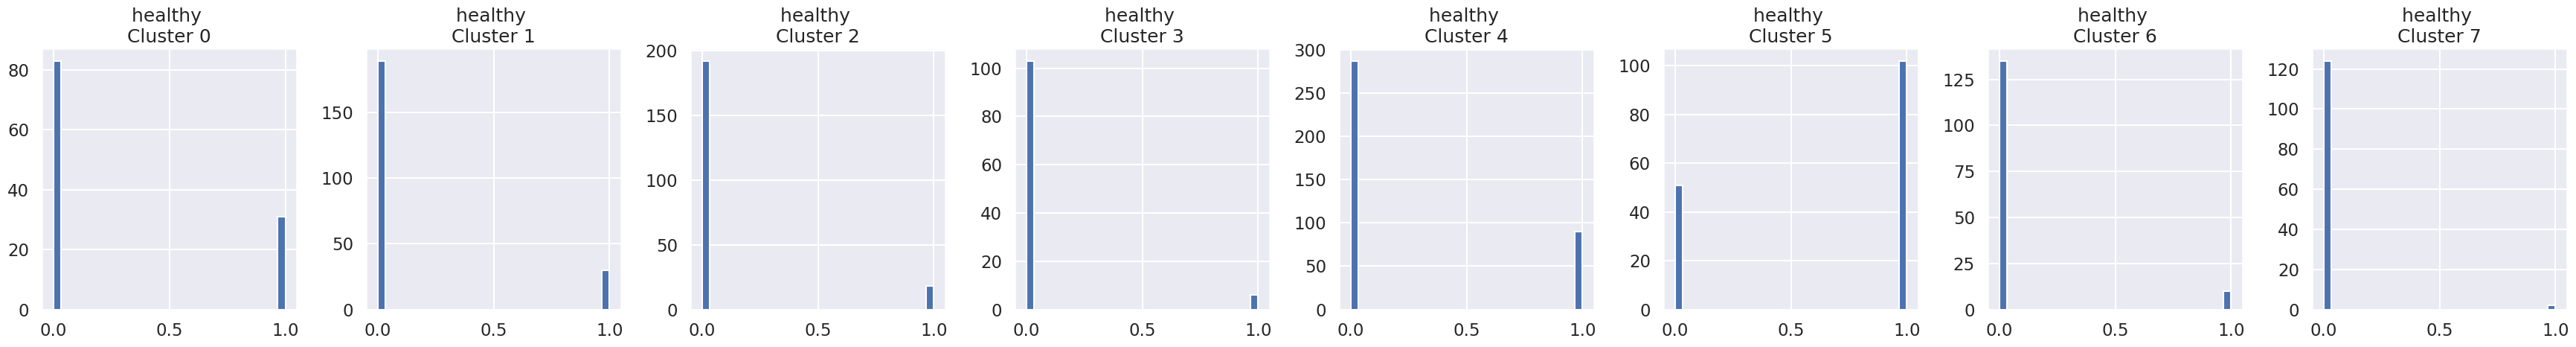

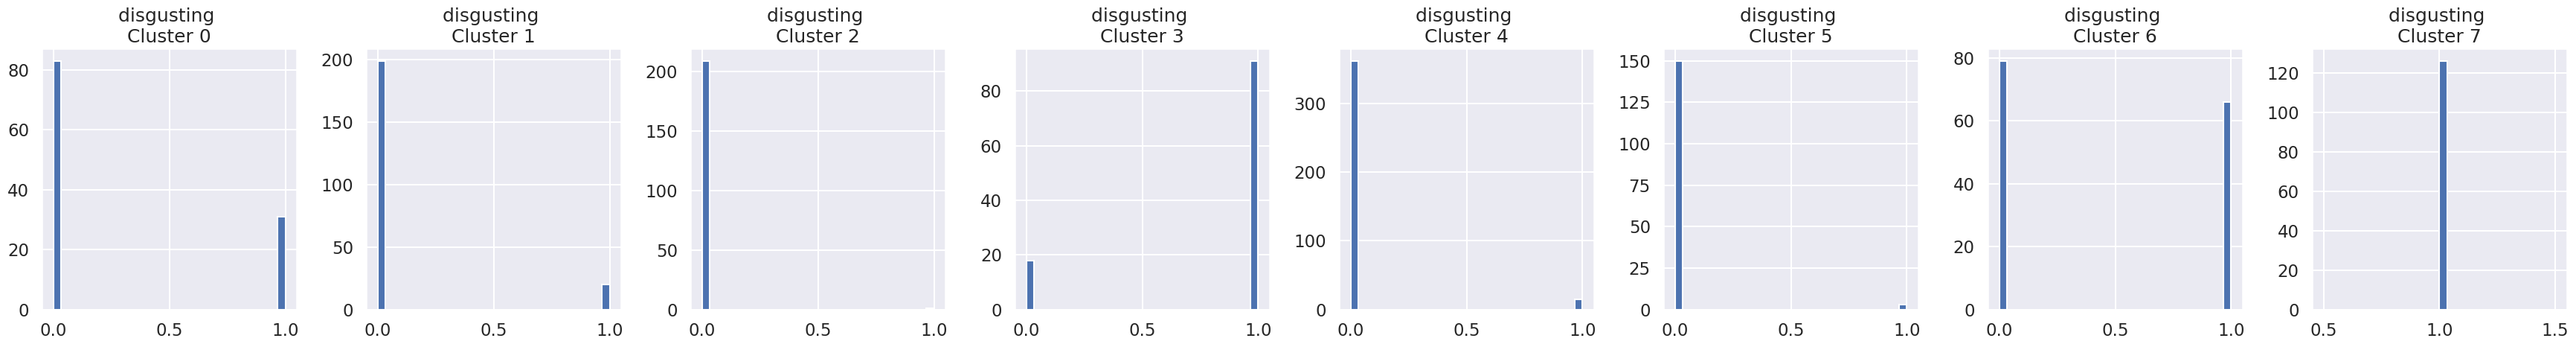

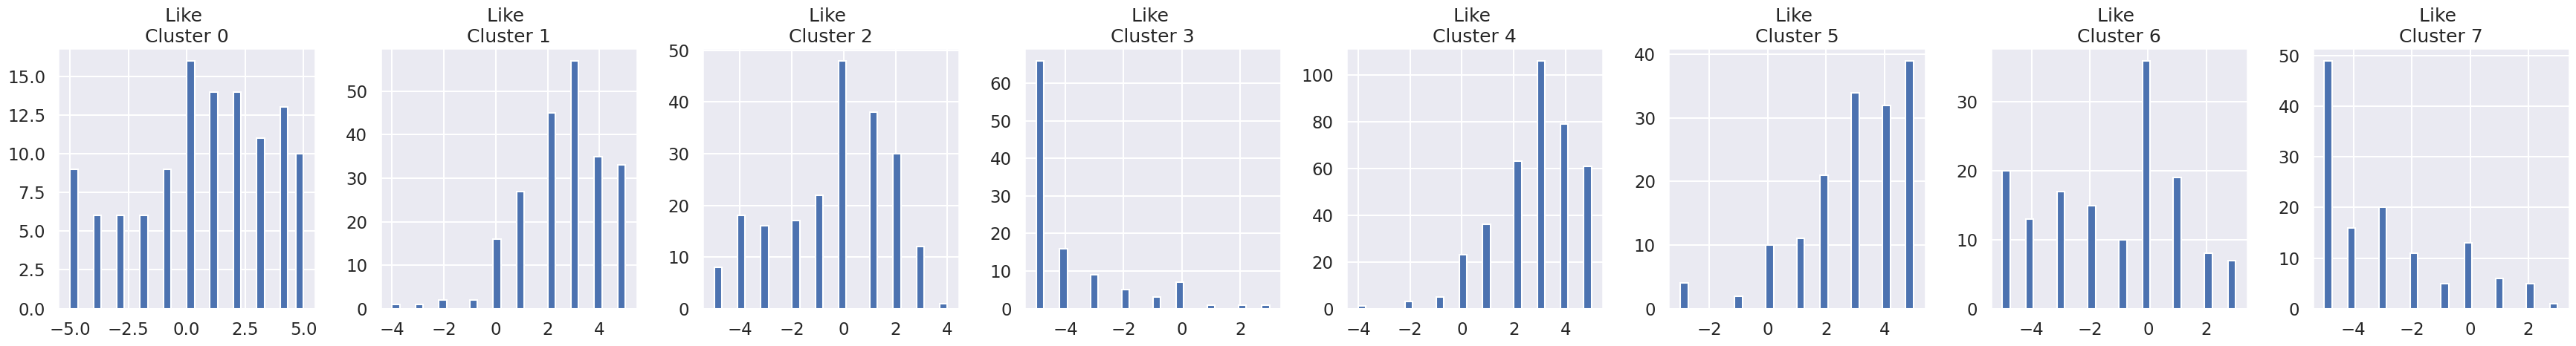

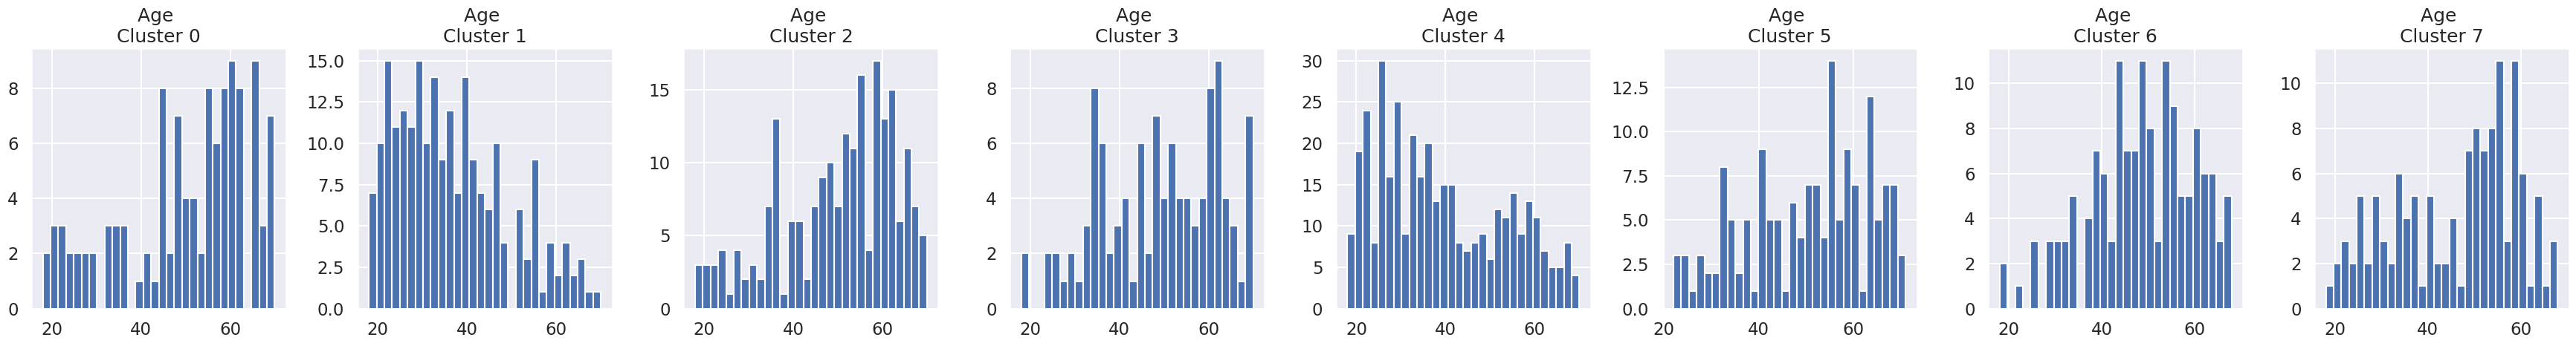

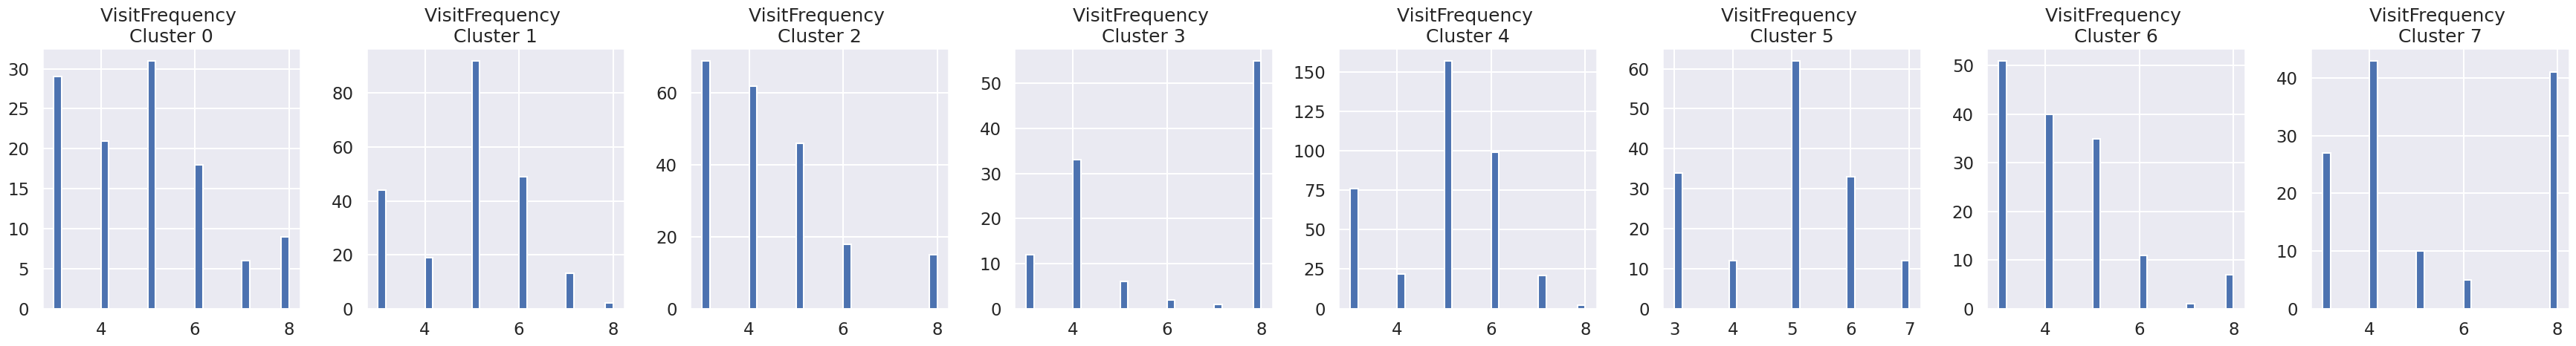

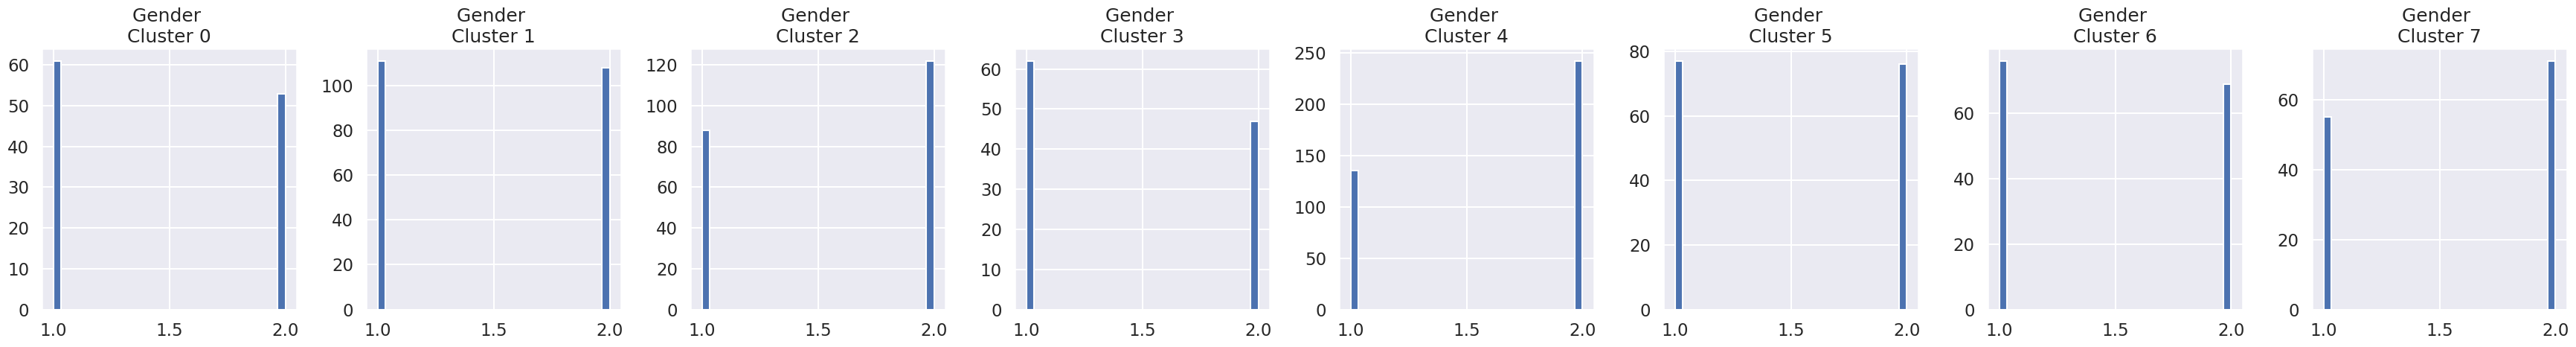

In [174]:
for feature in data.columns:
    plt.figure(figsize=(35, 5))
    for centroid in range(8):
        plt.subplot(1, 8, centroid + 1)
        cluster = data_with_centroids[data_with_centroids.centroid == centroid]
        cluster[feature].hist(bins=30)
        plt.title(f'{feature} \nCluster {centroid}')
    plt.show()


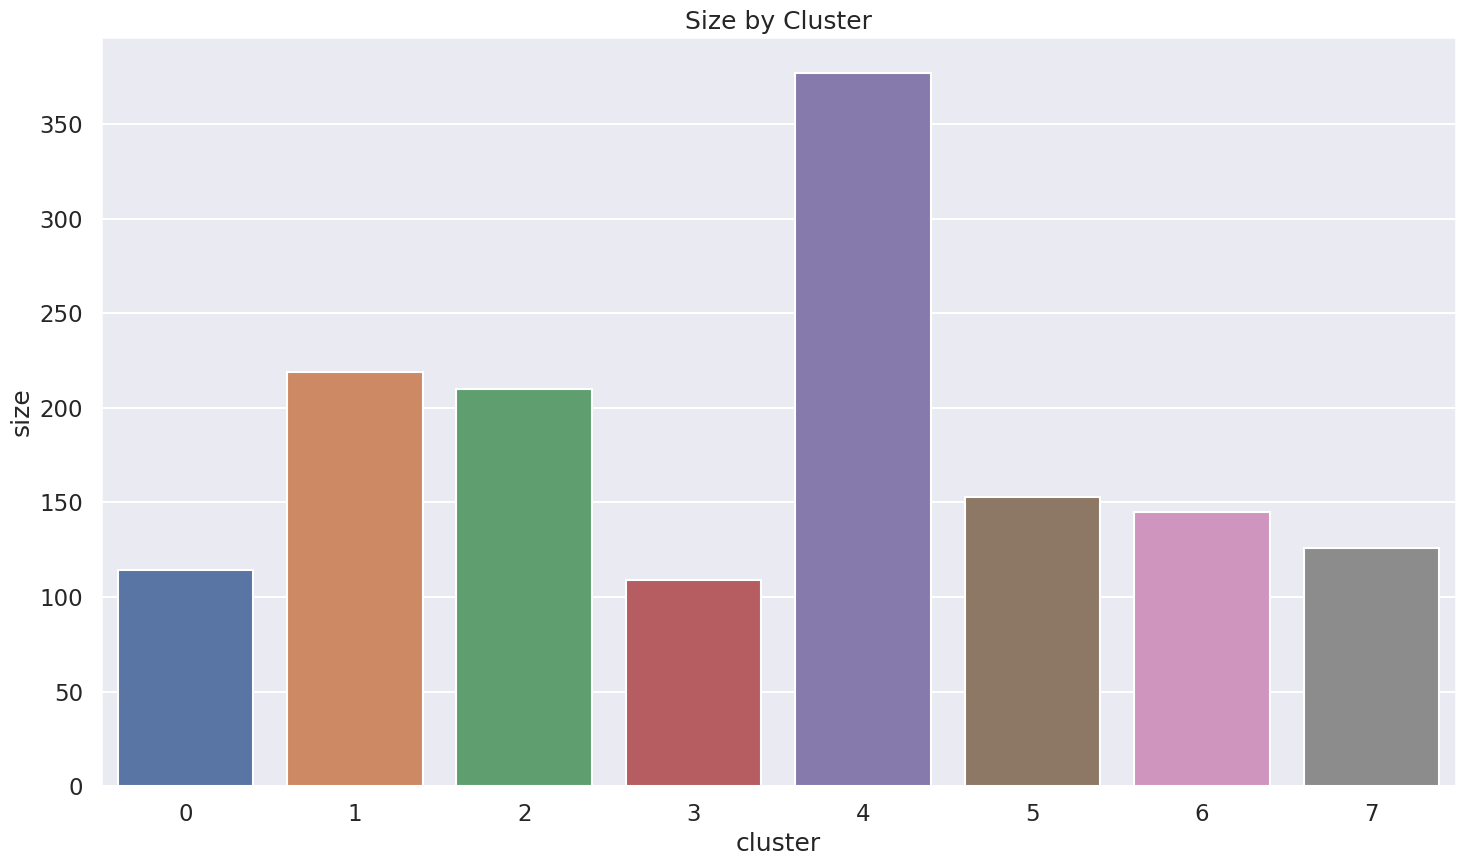

In [175]:
cluster_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centroids = pd.DataFrame(data=cluster_centroids, columns=data.columns)

cluster_size = []
for centroid, cluster_df in data_with_centroids.groupby("centroid"):
    cluster_size.append([centroid, len(cluster_df)])

cluster_sizes = pd.DataFrame(cluster_size, columns=["cluster", "size"])
cluster_sizes.set_index("cluster", drop=True, inplace=True)

sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('Size by Cluster')
plt.show()


In [181]:
from pandas.io.parsers.readers import read_csv
data=read_csv('mcdonalds.csv')
bin = data.iloc[:,0:11]
df = pd.get_dummies(bin) # converting to binary values
df = df.drop(df.columns[0::2], axis = 1)
# renaming the columns
df.columns = ["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]
# adding the descriptor variables
df["Like"] = data["Like"]
df["Age"] = data["Age"]
df["Gender"] = data["Gender"]
data_ = pd.read_csv("segment_data.csv") # this file contains the extracted segment
data_.head()

Unnamed: 0  yummy  convenient  spicy  fattening  greasy  fast  cheap  \
0           0      0           1      0          1       0     1      1   
1           1      1           1      0          1       1     1      1   
2           2      0           1      1          1       1     1      0   
3           3      1           1      0          1       1     1      1   
4           4      0           1      0          1       1     1      1   

   tasty  expensive  healthy  disgusting Like  Age  Gender    segment  
0      0          1        0           0   -3   61  Female  Segment 1  
1      1          1        0           0   +2   51  Female  Segment 0  
2      1          1        1           0   +1   62  Female  Segment 5  
3      1          0        0           1   +4   69  Female  Segment 0  
4      0          0        1           0   +2   49    Male  Segment 1

In [182]:
df["segment"] = data_["segment"]
df['segment'] = df['segment'].replace([0,1,2,3,4,5,6,7],['Segment 0',"Segment 1","Segment 2","Segment 3","Segment 4","Segment 5","Segment 6","Segment 7"])
df.head()

yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting Like  Age  Gender    segment  
0        0           0   -3   61  Female  Segment 1  
1        0           0   +2   51  Female  Segment 0  
2        1           0   +1   62  Female  Segment 5  
3        0           1   +4   69  Female  Segment 0  
4        1           0   +2   49    Male  Segment 1

Plot for LIKE

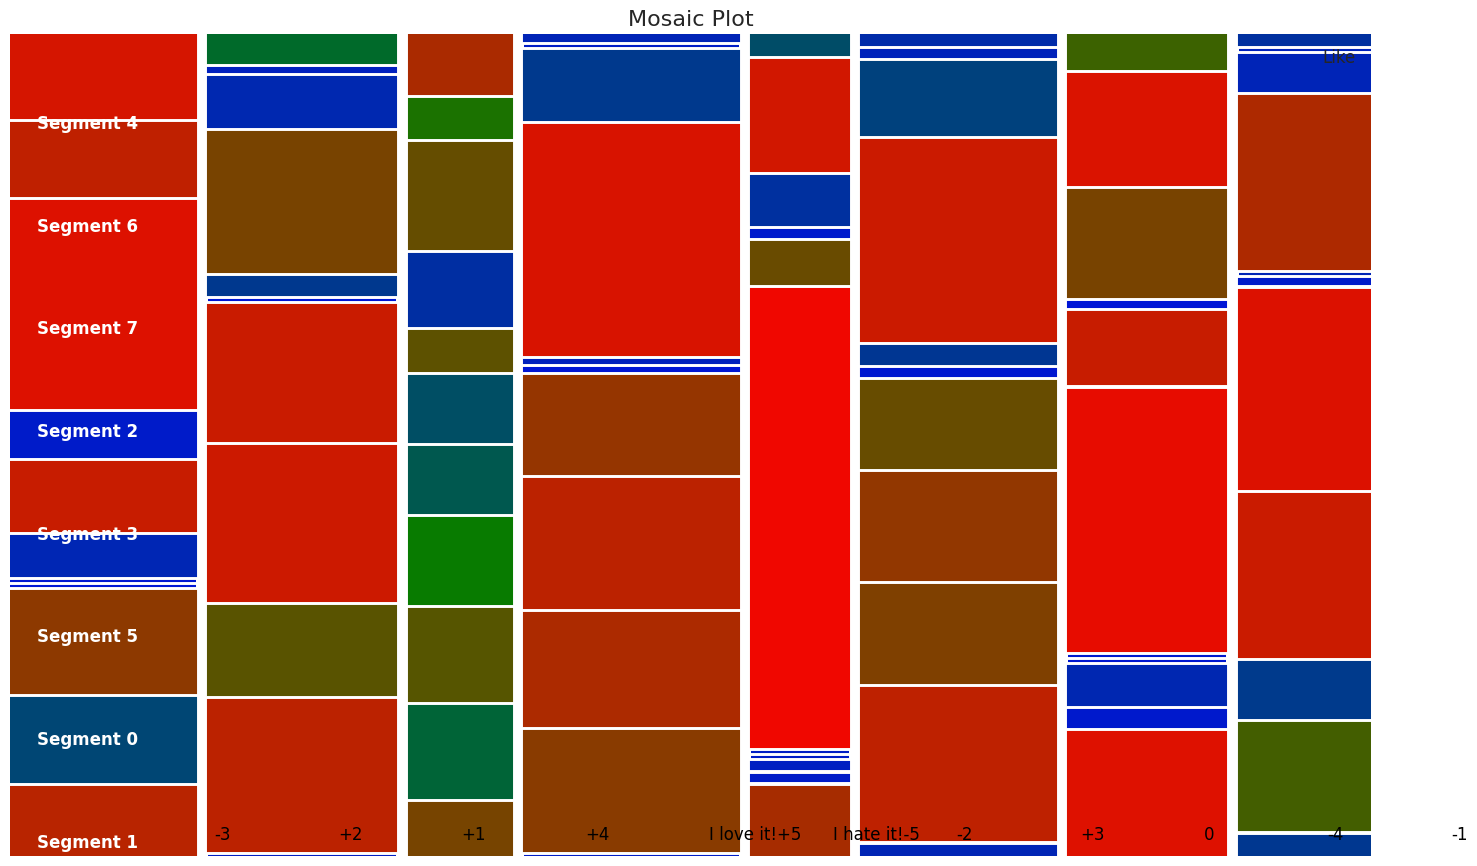

In [183]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"] = [15, 9]
plt.rcParams["figure.autolayout"] = True
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

mosaic(df, ['segment', 'Like'], gap=0.01, statistic=True, axes_label=False, title='Mosaic Plot', labelizer=lambda k: "")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mosaic Plot', fontsize=16)
plt.legend(loc='upper right', fontsize=12, frameon=False)

segments = df['segment'].unique()
for i, segment in enumerate(segments):
    plt.text(0.02, i / len(segments) + 0.01, segment, fontsize=12, color='white', weight='bold')

likes = df['Like'].unique()
for i, like in enumerate(likes):
    plt.text(0.15 + i / len(likes), 0.02, like, fontsize=12, color='black')

handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, likes, loc='upper right', fontsize=12, frameon=False, title='Like', title_fontsize=12)
for i, h in enumerate(handles):
    h.set_color(colors[i])

plt.box(on=None)

plt.show()

Plot for GENDER

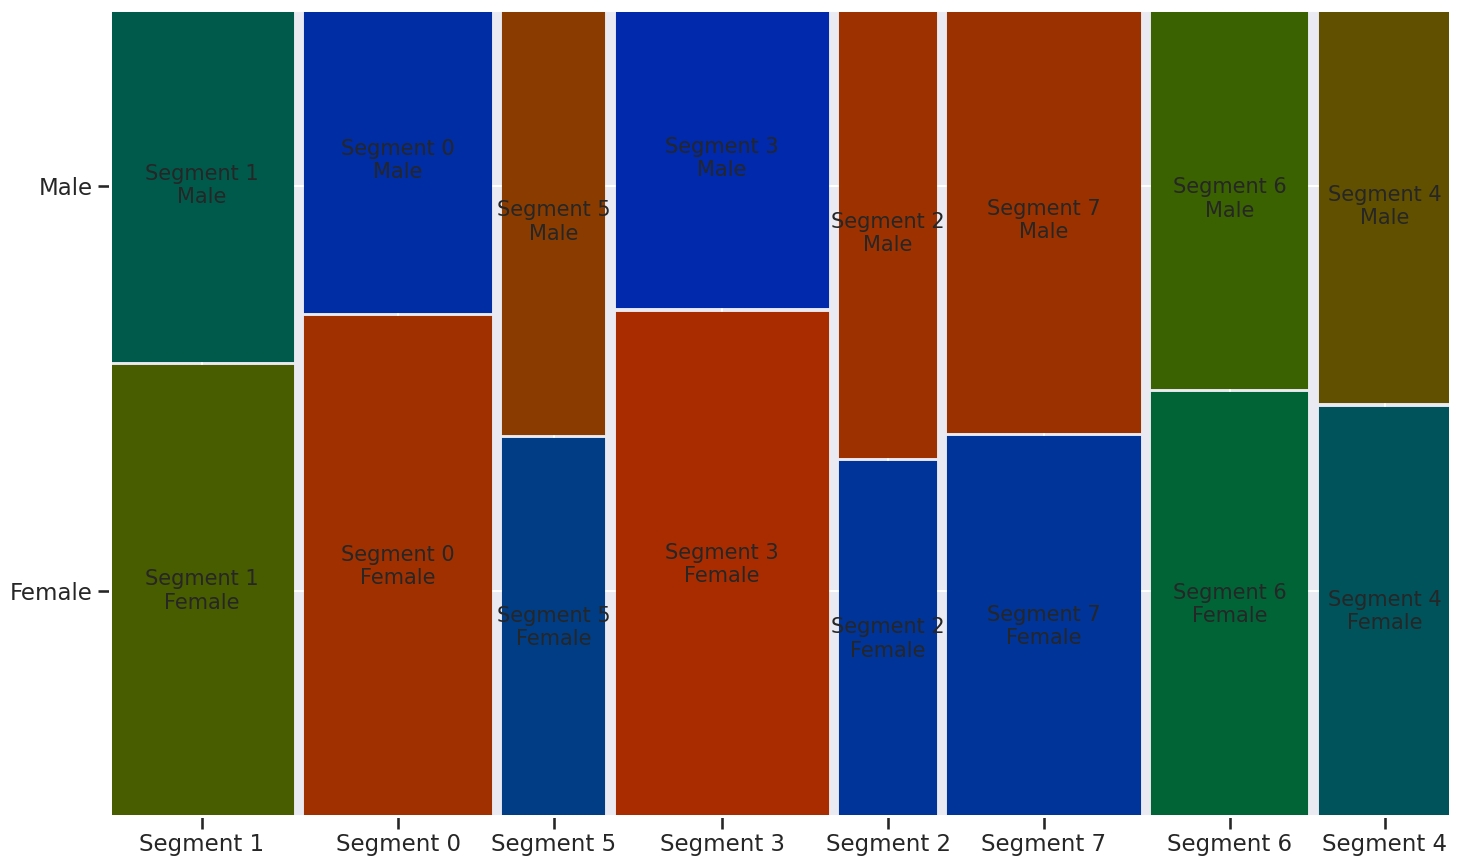

In [184]:
plt.rcParams["figure.figsize"] = [15, 9]
plt.rcParams["figure.autolayout"] = True
mosaic(df, ['segment', 'Gender'],gap=0.01,statistic = True)
plt.show()

Plot for AGE

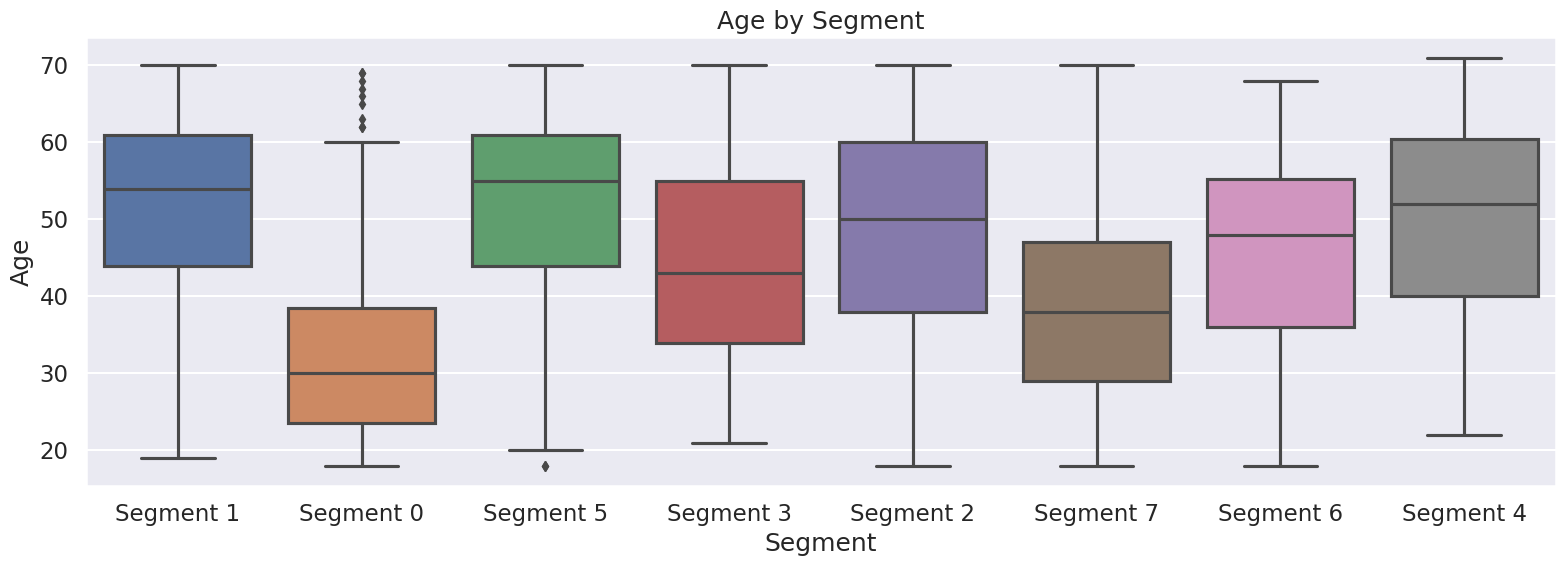

In [185]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="segment", y="Age", data=df)

plt.xlabel("Segment")
plt.ylabel("Age")
plt.title("Age by Segment")
plt.show()

In [186]:
df_new = df.iloc[:,:11]
df_new.head()

yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  
3        0           1  
4        1           0

In [187]:
y = df["segment"]
from sklearn.decomposition import PCA
pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(df_new)
pca.shape

(1453, 2)

In [188]:
def myplot(score,coeff,labels=True):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

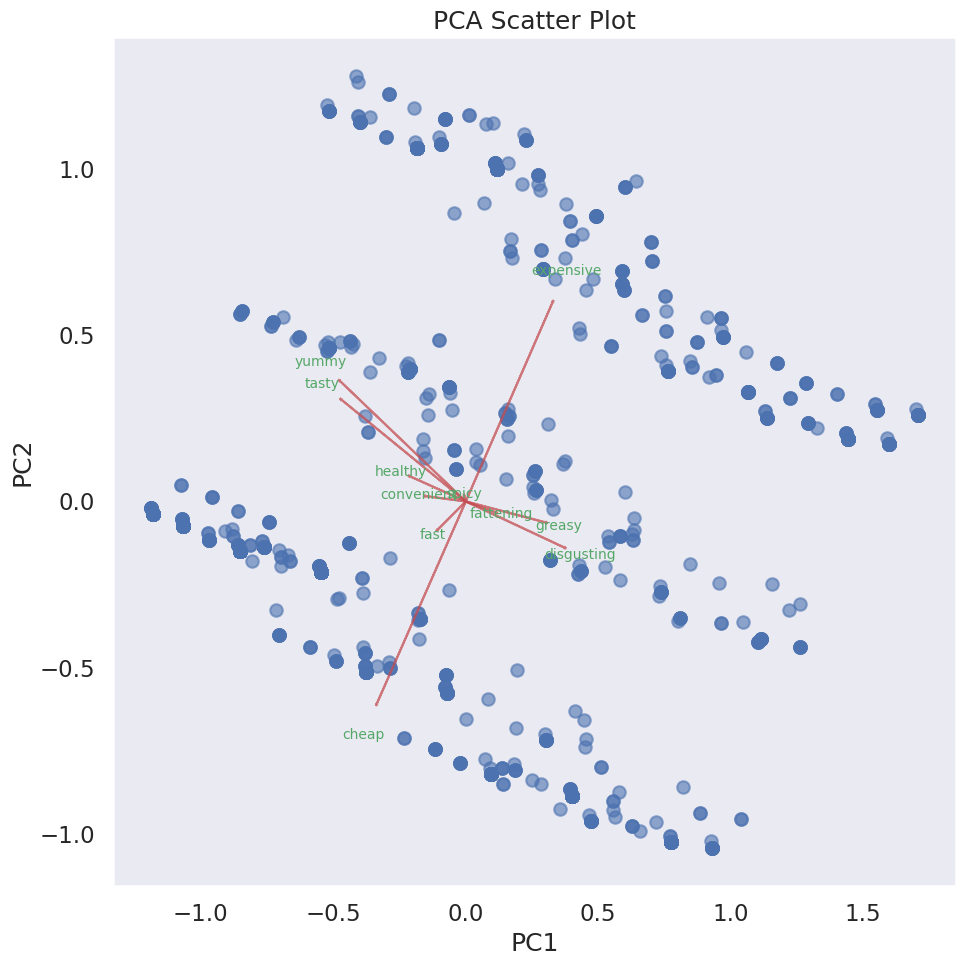

In [189]:
def myplot_2d(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    plt.figure(figsize=(10, 10))
    plt.scatter(xs, ys, alpha=0.6)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.7)
        if labels is not None:
            plt.text(coeff[i, 0]*1.15, coeff[i, 1]*1.15, labels[i], color='g', ha='center', va='center', fontsize=10)

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Scatter Plot")
    plt.grid()


myplot_2d(pca[:, 0:2], np.transpose(pcamodel.components_[0:2, :]), list(df_new.columns))
plt.show()

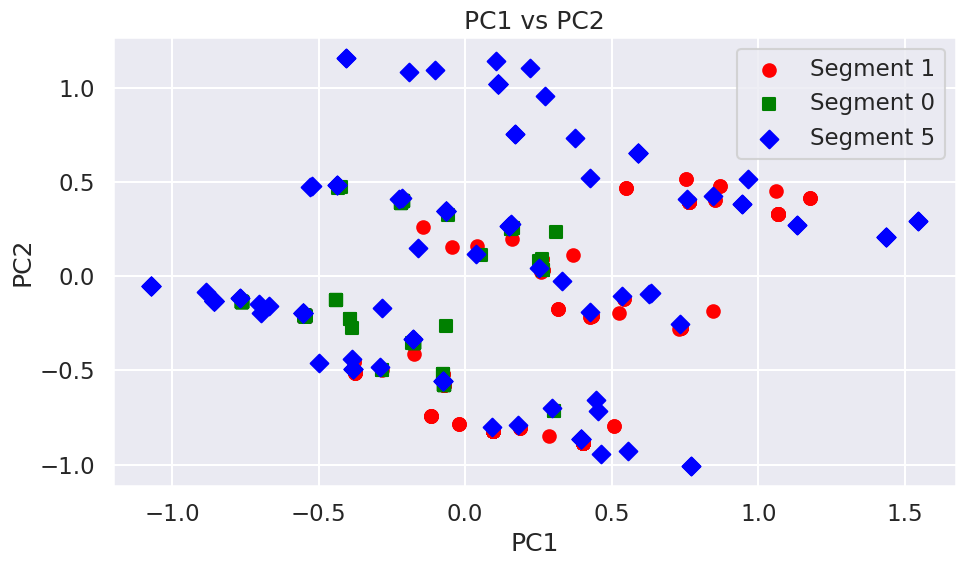

In [190]:
plt.figure(figsize=(10, 6))
segments = pca_data['segment'].unique()
colors = ['red', 'green', 'blue']
markers = ['o', 's', 'D']

for segment, color, marker in zip(segments, colors, markers):
    segment_data = pca_data[pca_data['segment'] == segment]
    plt.scatter(segment_data['PC1'], segment_data['PC2'], color=color, marker=marker, label=segment)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.legend()
plt.show()

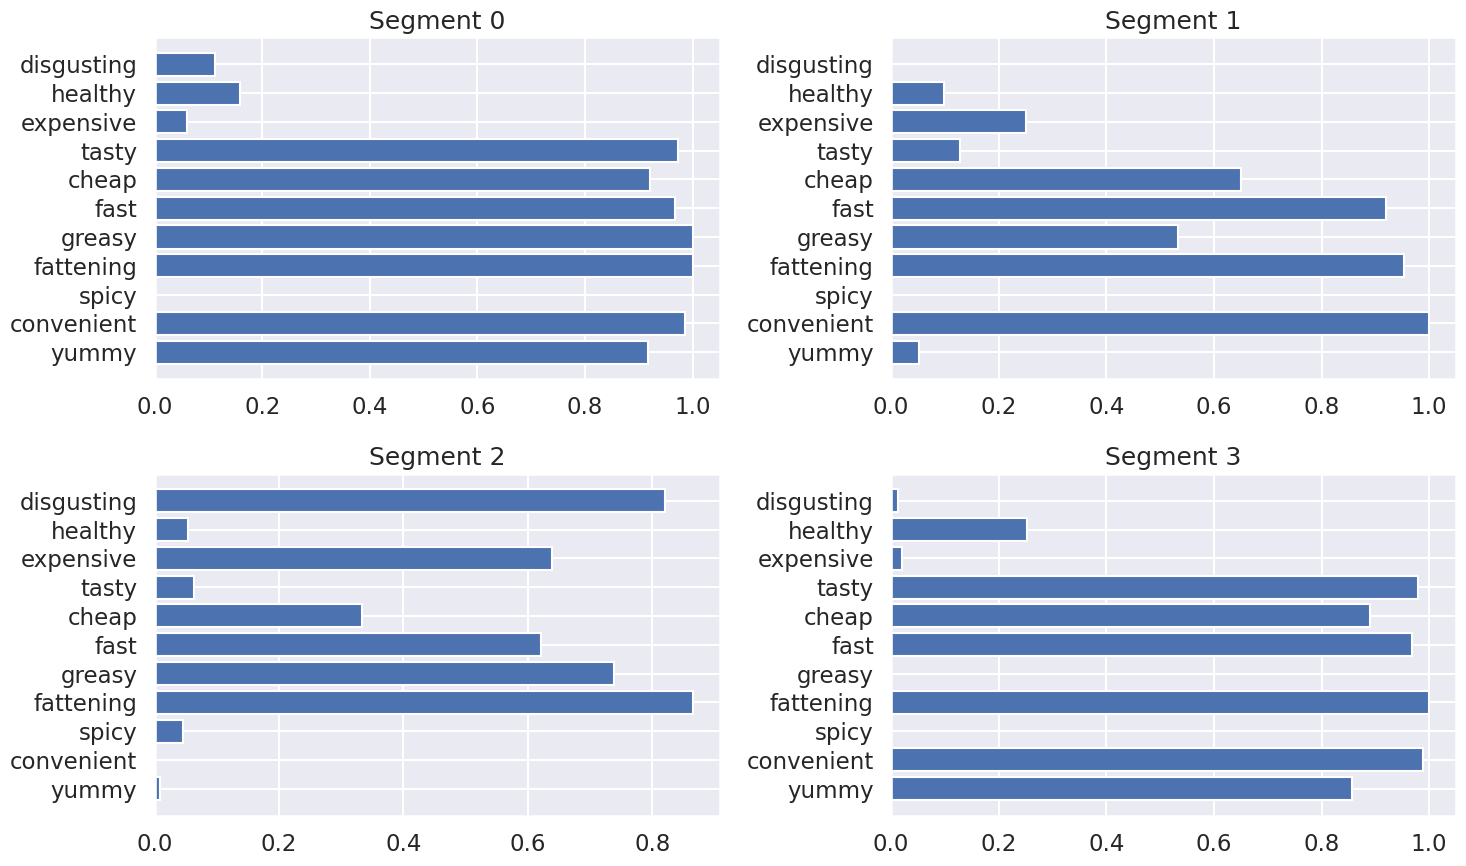

In [191]:
import warnings
warnings.filterwarnings("ignore")
df_new["segment"] = df["segment"]
def top_feature_(data,target,class_):
    x1 = data.groupby(by = target)
    x2 = x1.get_group(class_)
    x3 = list(dict(x2.mean()).keys())
    x4 = list(dict(x2.mean()).values())
    plt.title("{}".format(class_))
    plt.barh(x3,x4)
plt.subplot(2,2,1)
top_feature_(df_new,"segment","Segment 0")

plt.subplot(2,2,2)
top_feature_(df_new,"segment","Segment 1")

plt.subplot(2,2,3)
top_feature_(df_new,"segment","Segment 2")

plt.subplot(2,2,4)
top_feature_(df_new,"segment","Segment 3")

#Segment Evaluation

In [192]:
df = pd.read_csv("segment_data.csv")
df['segment'] = df['segment'].replace([0,1,2,3,4,5,6,7],['Segment 0',"Segment 1","Segment 2","Segment 3", "Segment 4","Segment 5","Segment 6","Segment 7"])
df.head()

Unnamed: 0  yummy  convenient  spicy  fattening  greasy  fast  cheap  \
0           0      0           1      0          1       0     1      1   
1           1      1           1      0          1       1     1      1   
2           2      0           1      1          1       1     1      0   
3           3      1           1      0          1       1     1      1   
4           4      0           1      0          1       1     1      1   

   tasty  expensive  healthy  disgusting Like  Age  Gender    segment  
0      0          1        0           0   -3   61  Female  Segment 1  
1      1          1        0           0   +2   51  Female  Segment 0  
2      1          1        1           0   +1   62  Female  Segment 5  
3      1          0        0           1   +4   69  Female  Segment 0  
4      0          0        1           0   +2   49    Male  Segment 1

In [193]:
avg_data = df.groupby(['segment'], as_index=False).mean()
avg_data

segment  Unnamed: 0     yummy  convenient     spicy  fattening    greasy  \
0  Segment 0  719.930233  0.916279    0.986047  0.000000   1.000000  1.000000   
1  Segment 1  745.787736  0.051887    1.000000  0.000000   0.952830  0.533019   
2  Segment 2  713.522523  0.009009    0.000000  0.045045   0.864865  0.738739   
3  Segment 3  712.448980  0.857143    0.987755  0.000000   1.000000  0.000000   
4  Segment 4  696.596026  0.807947    0.947020  0.092715   0.000000  0.059603   
5  Segment 5  647.324786  0.538462    0.974359  1.000000   0.914530  0.666667   
6  Segment 6  782.522222  0.027778    1.000000  0.000000   0.977778  0.800000   
7  Segment 7  749.810811  0.873874    0.972973  0.000000   0.986486  0.558559   

       fast     cheap     tasty  expensive   healthy  disgusting        Age  
0  0.967442  0.920930  0.972093   0.060465  0.158140    0.111628  33.516279  
1  0.919811  0.650943  0.127358   0.250000  0.099057    0.000000  51.391509  
2  0.621622  0.333333  0.063063   0.639640  0.054054    0.819820  49.234234  
3  0.967347  0.889796  0.979592   0.020408  0.253061    0.012245  44.444898  
4  0.940397  0.721854  0.874172   0.192053  0.682119    0.026490  50.059603  
5  0.948718  0.615385  0.752137   0.452991  0.264957    0.290598  50.589744  
6  0.900000  0.538889  0.161111   0.438889  0.016667    1.000000  45.661111  
7  0.828829  0.004505  0.918919   0.977477  0.130631    0.076577  39.004505

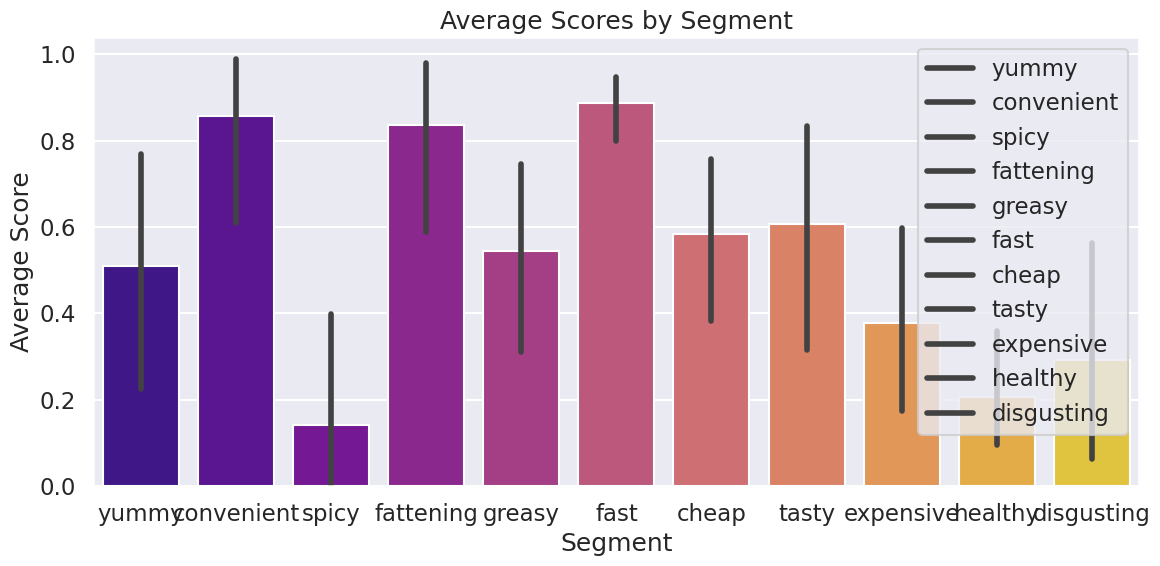

In [194]:
variables = ["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_data[variables], palette="plasma")
plt.xlabel('Segment')
plt.ylabel('Average Score')
plt.title('Average Scores by Segment')
plt.legend(variables, loc='upper right')
plt.show()

In [196]:
#compare distribution of gender (male/Female) accross segments
df = pd.DataFrame(df.groupby(['segment','Gender'])['Gender'].count())
df

Gender
segment   Gender        
Segment 0 Female     134
          Male        81
Segment 1 Female     119
          Male        93
Segment 2 Female      49
          Male        62
Segment 3 Female     154
          Male        91
Segment 4 Female      77
          Male        74
Segment 5 Female      55
          Male        62
Segment 6 Female      95
          Male        85
Segment 7 Female     105
          Male       117